fundamentals of classification, focusing on distinguishing between different classes (e.g., detecting the digit 5).

# Get the dataset

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

In [3]:
X , y= mnist.data , mnist.target

In [6]:
X.shape
# There are 70,000 images, and each image has 784 features.

(70000, 784)

In [5]:
y.shape

(70000,)

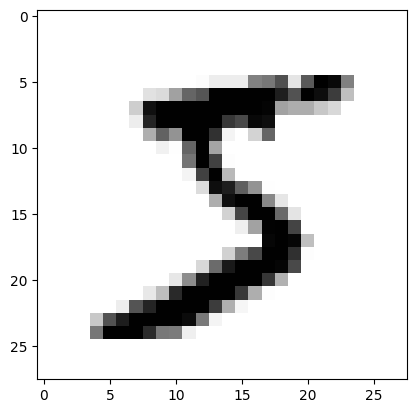

In [16]:
import matplotlib.pyplot as plt
def plot_digit(image_data):
  image = image_data.reshape(28, 28)
  plt.imshow(image, cmap="binary")

img = X[0]
plot_digit(img)
plt.show()

In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

 **One** Class vs other

In [13]:
y_train_5 = (y_train == '5') # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

In [14]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [17]:
sgd_clf.predict([img])

array([ True])

In [18]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
"""

🔹 What cross-validation does:
It splits your training data into K folds (subsets).

The model is trained on
K−1
K−1 folds and tested on the remaining one.

This process repeats K times (each fold used once for testing).

The function returns K accuracy scores, giving you a more stable estimate of model performance.
"""

In [23]:
score

array([0.95035, 0.96035, 0.9604 ])

In [27]:
from sklearn.metrics import confusion_matrix
y_train_pred = sgd_clf.predict(X_train)
confusion_matrix(y_train_5, y_train_pred ,normalize='true')

array([[0.95853717, 0.04146283],
       [0.11086515, 0.88913485]])

In [33]:
from sklearn.metrics import precision_score, recall_score,f1_score
precision_score(y_train_5, y_train_pred) # == 3530 / (687 + 3530)



0.6805026118876183

In [31]:
recall_score(y_train_5, y_train_pred) # == 3530 / (1891 + 3530)


0.8891348459693783

In [34]:
f1_score(y_train_5, y_train_pred)


0.7709532949456174

In [36]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
method="decision_function")

In [69]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

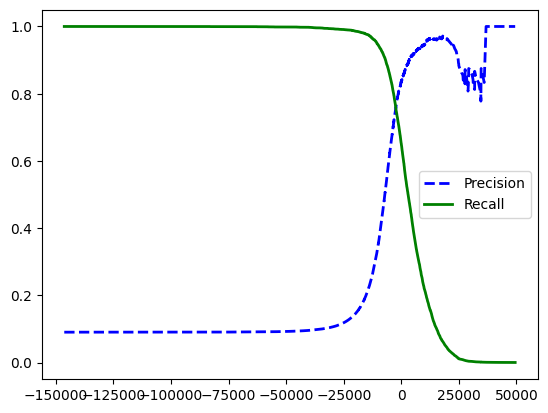

In [70]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.legend()

plt.show()

In [42]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

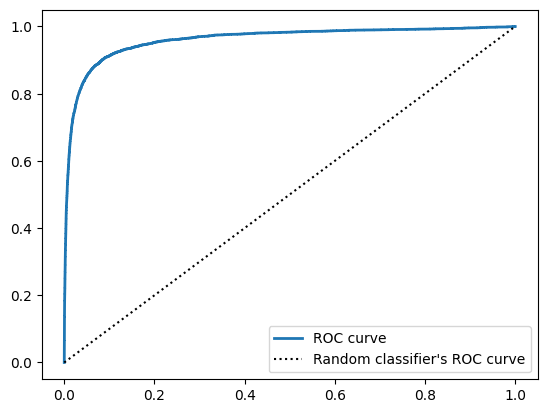

In [55]:

plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.legend()

plt.show()

In [46]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

np.float64(0.9604938554008616)

In [47]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [48]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
method="predict_proba")

In [49]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [50]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
y_train_5, y_scores_forest)

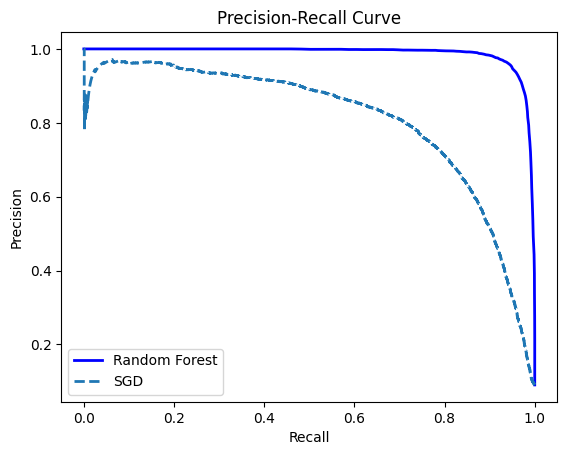

In [57]:
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()
#RandomForestClassifier’s PR curve looks much better than the SGDClassifier’s

**Multiclass** **Classification**

In [58]:
from sklearn.svm import SVC


svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [59]:
svm_clf.predict([img])

array(['5'], dtype=object)

In [60]:
some_digit_scores = svm_clf.decision_function([img])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [61]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([img])


array(['3'], dtype='<U1')

In [62]:
sgd_clf.decision_function([img]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [63]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")





array([0.8983, 0.891 , 0.9018])

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)


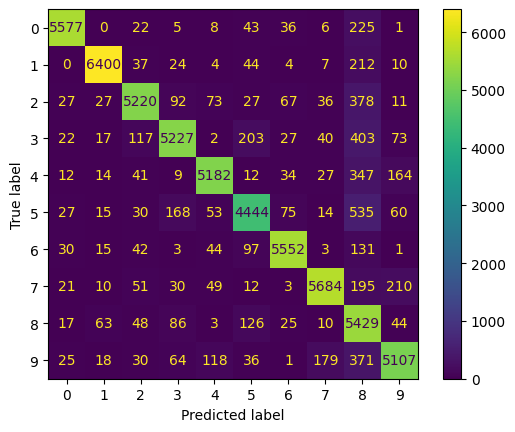

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

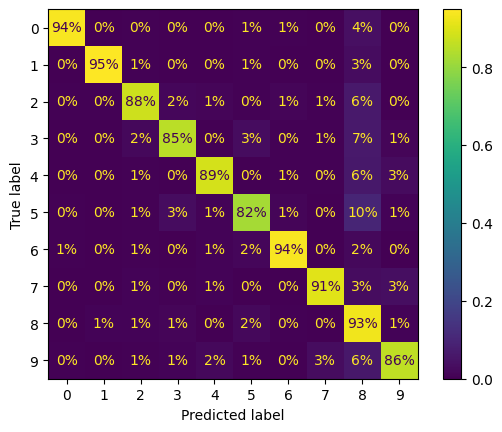

In [68]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
normalize="true", values_format=".0%")
plt.show()